<a href="https://colab.research.google.com/github/Dollar4short/Dollar4short/blob/main/pokll4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
heart_data1 = read.csv('/content/framing_new_train.csv')
head(heart_data1, 10)
library(dplyr)
str(heart_data1)
summary(heart_data1)
library(ggplot2)


,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,0,36,3,0,0,0,0,0,0,188,112,78.0,22.54,63,73,0
2,0,61,1,1,6,0,0,1,0,290,178,91.0,28.87,110,80,0
3,0,48,2,0,0,0,0,1,0,211,149,100.0,30.91,78,62,0
4,0,60,1,0,0,0,0,1,0,212,146,80.0,28.53,95,72,1
5,0,43,2,1,2,0,0,0,0,213,113,77.0,29.34,100,73,0
6,0,51,2,0,0,0,0,0,0,284,132,78.0,21.94,68,94,1
7,1,58,2,1,20,0,0,0,0,220,129,82.0,26.33,72,80,1
8,0,61,1,1,20,0,0,1,0,245,140,73.0,30.74,90,91,1
9,0,42,2,1,30,0,0,0,0,190,108,70.5,21.59,72,85,0


'data.frame':	1255 obs. of  16 variables:
 $ gender         : int  0 0 0 0 0 0 1 0 0 0 ...
 $ age            : int  36 61 48 60 43 51 58 61 42 63 ...
 $ education      : int  3 1 2 1 2 2 2 1 2 1 ...
 $ currentSmoker  : int  0 1 0 0 1 0 1 1 1 0 ...
 $ cigsPerDay     : int  0 6 0 0 2 0 20 20 30 0 ...
 $ BPMeds         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentStroke: int  0 0 0 0 0 0 0 0 0 0 ...
 $ prevalentHyp   : int  0 1 1 1 0 0 0 1 0 1 ...
 $ diabetes       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ totChol        : int  188 290 211 212 213 284 220 245 190 306 ...
 $ sysBP          : num  112 178 149 146 113 132 129 140 108 195 ...
 $ diaBP          : num  78 91 100 80 77 78 82 73 70.5 105 ...
 $ BMI            : num  22.5 28.9 30.9 28.5 29.3 ...
 $ heartRate      : int  63 110 78 95 100 68 72 90 72 75 ...
 $ glucose        : int  73 80 62 72 73 94 80 91 85 87 ...
 $ TenYearCHD     : int  0 0 0 1 0 1 1 1 0 1 ...


     gender            age          education     currentSmoker   
 Min.   :0.0000   Min.   :34.00   Min.   :1.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:43.00   1st Qu.:1.000   1st Qu.:0.0000  
 Median :0.0000   Median :50.00   Median :2.000   Median :0.0000  
 Mean   :0.4701   Mean   :50.61   Mean   :1.948   Mean   :0.4805  
 3rd Qu.:1.0000   3rd Qu.:58.00   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :69.00   Max.   :4.000   Max.   :1.0000  
   cigsPerDay         BPMeds        prevalentStroke     prevalentHyp   
 Min.   : 0.000   Min.   :0.00000   Min.   :0.000000   Min.   :0.0000  
 1st Qu.: 0.000   1st Qu.:0.00000   1st Qu.:0.000000   1st Qu.:0.0000  
 Median : 0.000   Median :0.00000   Median :0.000000   Median :0.0000  
 Mean   : 9.037   Mean   :0.04303   Mean   :0.007968   Mean   :0.3538  
 3rd Qu.:20.000   3rd Qu.:0.00000   3rd Qu.:0.000000   3rd Qu.:1.0000  
 Max.   :70.000   Max.   :1.00000   Max.   :1.000000   Max.   :1.0000  
    diabetes          totCh

gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0.07124556,0.2933295,-0.08193732,0.01245244,0.03741,0.0867059,0.07537712,0.2161353,0.1380989,0.1213945,0.2719354,0.1655731,0.1032386,0.02379468,0.1188959,1


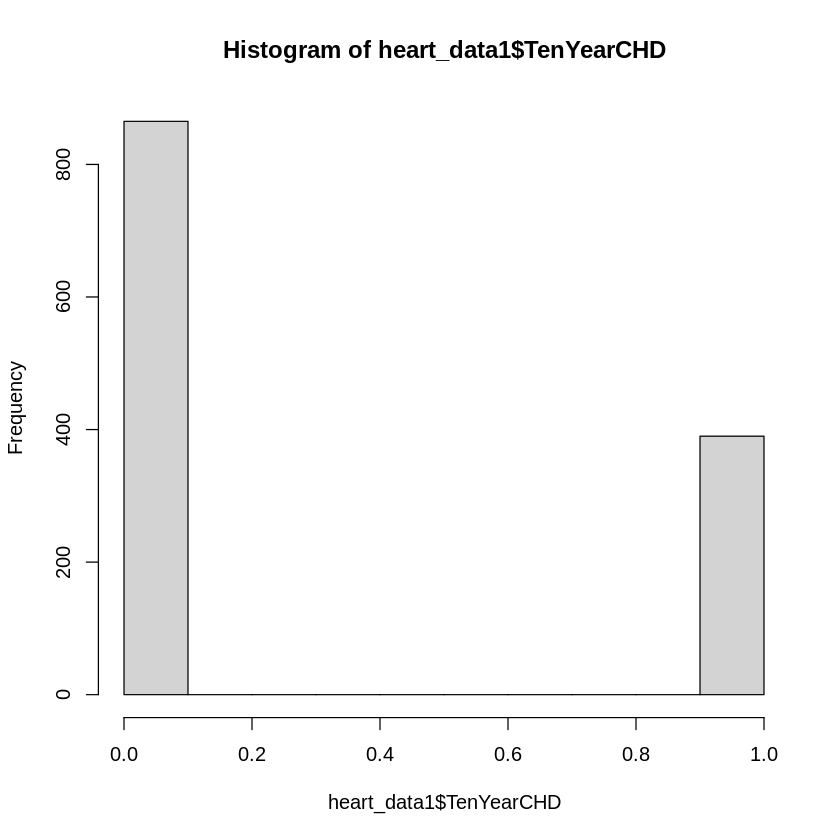

In [31]:
#Data Preprocessing
hist(heart_data1$TenYearCHD)
#quick multicollinearity check
cor(heart_data1$TenYearCHD,heart_data1[1:16])


In [32]:
#converting to factors
heart_data1 %>% select(-c(age, cigsPerDay, education,totChol,sysBP, diaBP,BMI, heartRate, glucose)) -> heart_data23
col_names <- names(heart_data23)
col_names
heart_data1[,col_names] <- lapply(heart_data23[,col_names], factor)


[1] "gender"          "currentSmoker"   "BPMeds"          "prevalentStroke"
[5] "prevalentHyp"    "diabetes"        "TenYearCHD"

In [33]:
#fitting the base model
glm(TenYearCHD~.,data=heart_data1,family=binomial(logit))->model
#summary
summary(model)
model$coefficients
heart_data1$TenYearCHDnew<- model$fitted.values
head(heart_data1[c("TenYearCHD","TenYearCHDnew")], 10)
tail(heart_data1[c("TenYearCHD","TenYearCHDnew")], 10)


Call:
glm(formula = TenYearCHD ~ ., family = binomial(logit), data = heart_data1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9813  -0.8383  -0.5711   1.0438   2.4642  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -7.0853466  0.9653112  -7.340 2.14e-13 ***
gender1           0.3889573  0.1458116   2.668  0.00764 ** 
age               0.0613580  0.0092936   6.602 4.05e-11 ***
education        -0.0524961  0.0665029  -0.789  0.42989    
currentSmoker1    0.1521363  0.2106609   0.722  0.47018    
cigsPerDay        0.0138331  0.0086014   1.608  0.10778    
BPMeds1          -0.0401976  0.3235327  -0.124  0.90112    
prevalentStroke1  1.1616497  0.7544601   1.540  0.12363    
prevalentHyp1     0.1571986  0.1932542   0.813  0.41597    
diabetes1         0.9421550  0.5009670   1.881  0.06002 .  
totChol           0.0027492  0.0015261   1.801  0.07163 .  
sysBP             0.0179187  0.0054807   3.269  0.00108 ** 
diaBP   

(Intercept)          gender1              age        education 
   -7.0853465656     0.3889573230     0.0613579598    -0.0524961070 
  currentSmoker1       cigsPerDay          BPMeds1 prevalentStroke1 
    0.1521363029     0.0138330699    -0.0401976370     1.1616496569 
   prevalentHyp1        diabetes1          totChol            sysBP 
    0.1571985781     0.9421549722     0.0027491913     0.0179186784 
           diaBP              BMI        heartRate          glucose 
   -0.0085727771     0.0183173125    -0.0025398863     0.0005563846

,TenYearCHD,TenYearCHDnew
,<fct>,<dbl>
1,0,0.05287955
2,0,0.62197458
3,0,0.21539607
4,1,0.38587864
5,0,0.10931063
6,1,0.21378594
7,1,0.43621828
8,1,0.53306634
9,0,0.12640768


,TenYearCHD,TenYearCHDnew
,<fct>,<dbl>
1246,0,0.0527715
1247,1,0.5481776
1248,1,0.4605875
1249,0,0.1437522
1250,1,0.9048406
1251,0,0.1671766
1252,0,0.0939486
1253,1,0.3769205
1254,0,0.3591211


In [34]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("caret"):
“installation of package ‘caret’ had non-zero exit status”


age            sysBP          gender1        diabetes1 
       6.6021898        3.2694201        2.6675335        1.8806728 
         totChol       cigsPerDay prevalentStroke1              BMI 
       1.8014545        1.6082390        1.5397098        1.0567742 
           diaBP    prevalentHyp1        education   currentSmoker1 
      -0.9596969        0.8134289       -0.7893809        0.7221856 
       heartRate          glucose          BPMeds1 
      -0.4416756        0.1818503       -0.1242460

,gender,age,diabetes,totChol,sysBP,TenYearCHD
,<fct>,<int>,<fct>,<int>,<dbl>,<fct>
1,0,36,0,188,112,0
2,0,61,0,290,178,0
3,0,48,0,211,149,0
4,0,60,0,212,146,1
5,0,43,0,213,113,0
6,0,51,0,284,132,1
7,1,58,0,220,129,1
8,0,61,0,245,140,1
9,0,42,0,190,108,0


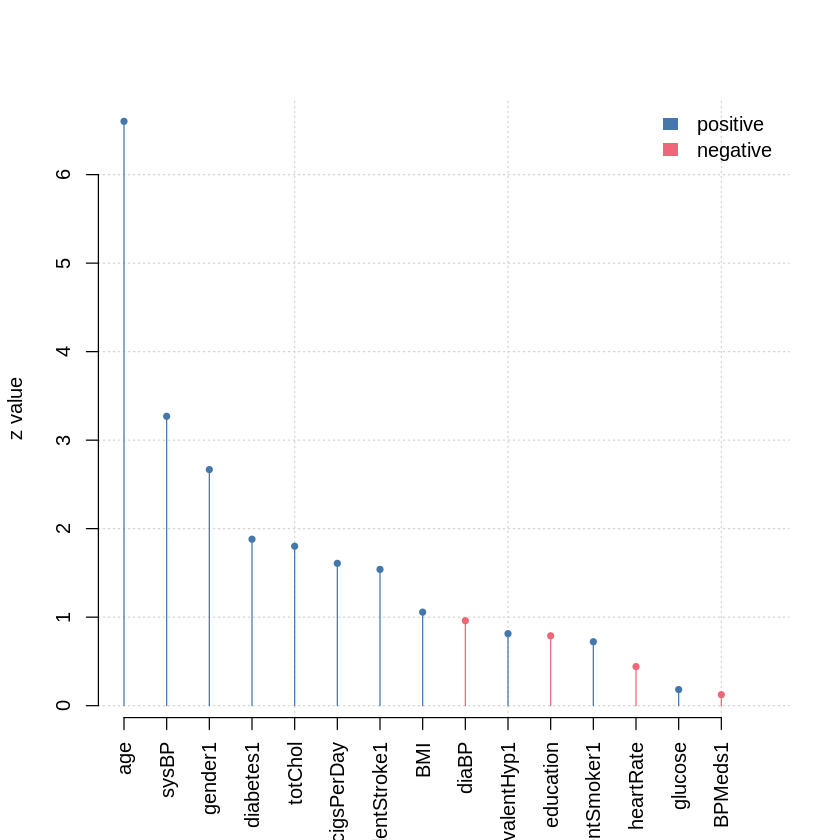

In [49]:
library(caret)
varImp(model)
#refitting a lesser model for comparison
heart_data1[c("gender","age","diabetes","totChol","sysBP","TenYearCHD")]->heart_data2
head(heart_data2, 10)


In [50]:
glm(TenYearCHD~.,data=heart_data2,family=binomial(logit))->logmodel2
summary(logmodel2)
logmodel2$coefficients
heart_data1$TenYearCHDnew2<- logmodel2$fitted.values
head(heart_data1[c("TenYearCHD","TenYearCHDnew2")], 10)
tail(heart_data1[c("TenYearCHD","TenYearCHDnew2")], 10)



Call:
glm(formula = TenYearCHD ~ ., family = binomial(logit), data = heart_data2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9956  -0.8380  -0.5878   1.0817   2.5351  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.120709   0.603814 -11.793  < 2e-16 ***
gender1      0.508796   0.133814   3.802 0.000143 ***
age          0.059049   0.008483   6.961 3.38e-12 ***
diabetes1    1.036811   0.359559   2.884 0.003932 ** 
totChol      0.002829   0.001514   1.869 0.061676 .  
sysBP        0.016843   0.002993   5.627 1.83e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1555.5  on 1254  degrees of freedom
Residual deviance: 1383.2  on 1249  degrees of freedom
AIC: 1395.2

Number of Fisher Scoring iterations: 4


(Intercept)      gender1          age    diabetes1      totChol        sysBP 
-7.120709070  0.508796197  0.059048772  1.036810825  0.002829426  0.016843136

,TenYearCHD,TenYearCHDnew2
,<fct>,<dbl>
1,0,0.07066032
2,0,0.57441258
3,0,0.23510038
4,1,0.37312194
5,0,0.11148416
6,1,0.25305760
7,1,0.40327300
8,1,0.38521151
9,0,0.09245584


,TenYearCHD,TenYearCHDnew2
,<fct>,<dbl>
1246,0,0.07051876
1247,1,0.55405304
1248,1,0.43291187
1249,0,0.21526322
1250,1,0.68166350
1251,0,0.13026965
1252,0,0.10209164
1253,1,0.32375180
1254,0,0.34174502


In [ ]:
install.packages('modEvA')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘terra’




age     sysBP   gender1 diabetes1   totChol 
 6.961094  5.626988  3.802273  2.883559  1.868619

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1239,1367.390,NA,NA,NA
2,1249,1383.209,-10,-15.81922,0.1049257


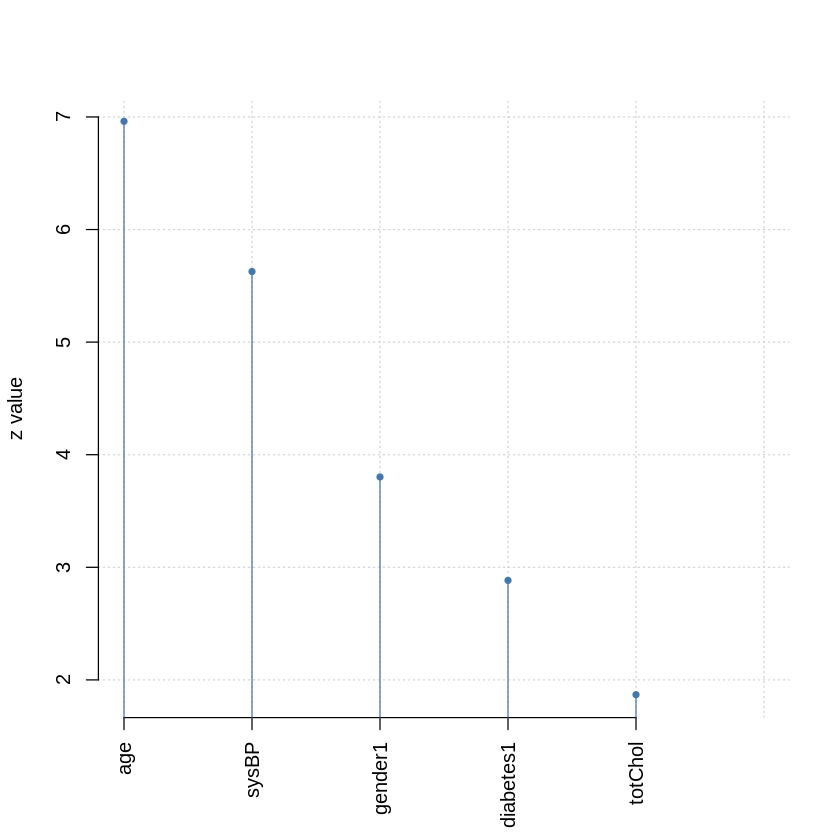

$CoxSnell
[1] 0.1282489

$Nagelkerke
[1] 0.1805192

$McFadden
[1] 0.1107393

$Tjur
[1] 0.1351533

$sqPearson
[1] 0.1352319

[1] 0.7067729

   pred
    FALSE TRUE
  0   749  116
  1   252  138

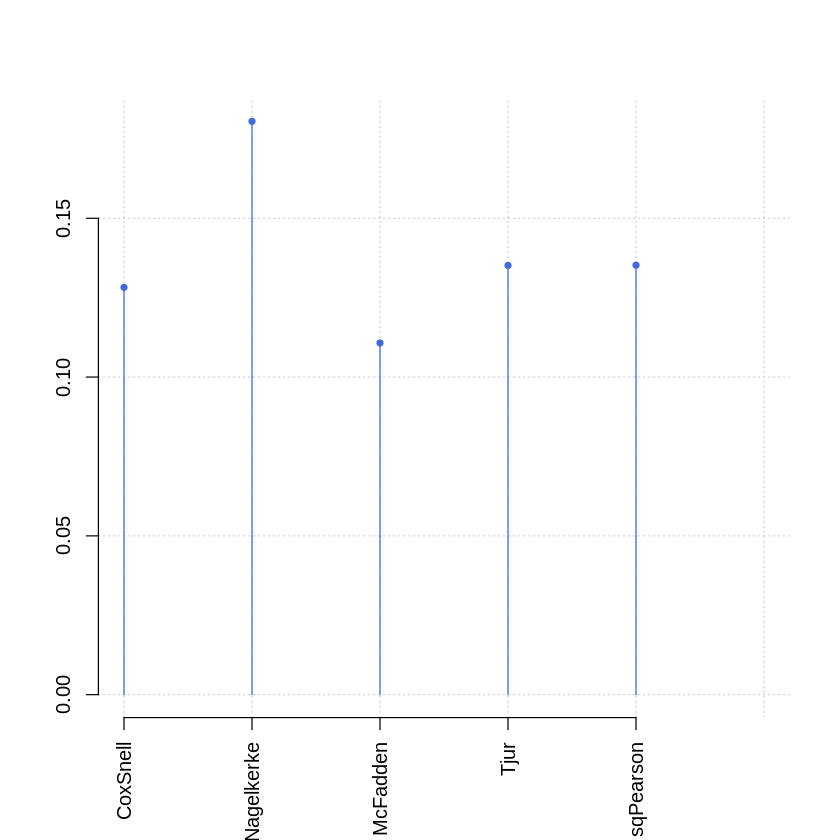

In [51]:
varImp(logmodel2)
#model comparison
#anova test
anova(model, logmodel2, test = "Chisq")
#chisquare test
library(modEvA)
RsqGLM(logmodel2)
#model Evaluation
pred = heart_data1$TenYearCHDnew2 > 0.45
tab<-table(heart_data1$TenYearCHD, pred)
sum(diag(tab))/sum(tab)
tab



In [52]:
#model Prediction
test = read.csv('/content/framing_new_test.csv')
head(test, 5)
test[,col_names] <- lapply(test[,col_names], factor)
test[c("gender","age","diabetes","totChol","sysBP","totChol")]->testdata
pred2 <- predict(logmodel2,testdata, type = "response")
head(pred2,5)
prediction <- ifelse(pred2 >0.45, 1, 0)
prediction -> test$Prediction
head(test[c("TenYearCHD","Prediction")], 10)
confusion_matrix <- table(test$TenYearCHD,test$Prediction)
confusion_matrix
sum(diag(confusion_matrix))/sum(confusion_matrix)



,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,52,1,0,0,0,0,0,0,215,129,80,29.29,70,87,0
2,1,38,1,0,0,0,0,0,0,221,130,87,26.43,72,55,0
3,0,54,2,1,10,0,0,1,0,246,153,80,37.30,92,74,0
4,0,50,1,0,0,0,0,1,0,240,163,105,31.37,89,75,0
5,1,46,2,1,20,0,0,0,0,179,111,80,20.87,72,76,0


1         2         3         4         5 
0.3185842 0.1746319 0.3409560 0.3221787 0.1795183

,TenYearCHD,Prediction
,<fct>,<dbl>
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,1
7,1,1
8,0,1
9,0,0


   
      0   1
  0 327  45
  1  99  68

[1] 0.7328386